# 0. Overview
- Environmnt
  - Environment yields 2 (potentially different) scores. The maximum of these 2 scores is taken.
- Objectives
  - The goal is to get an average score of +0.5 over 100 consecutive episodes.
- Applied algorithms
  - Independent DDPG  

# 1. Setup the environment
- Prepare unity environment with Tennis
- Import required libraries
- Import network

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import time
import matplotlib.pyplot as plt

from src_pytorch.Agent import DDPGAgent

# 2.  Get the default brain

In [2]:
env = UnityEnvironment(file_name="Reacher_Windows_x86_64\Reacher.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# 3. Set hyperparameters

In [3]:
ACTION_SIZE = 4
STATE_SIZE = 33

TRAINING_EPISODES = 1000

LR_ACTOR = 1e-4
LR_CRITIC = 3e-4

HIDDEN_UNITS = [512, 256]

GAMMA = 0.99
TAU = 1e-3

EVERY = 100

NUM_ACTORS = 20

EPSILON = 0.3
EPSILON_DECAY = 1e-6

MEMORY_SIZE = int(1e6)
BATCH_SIZE = 256

# 4. Train

C:\Users\Lab\Anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Ep: 10	Average Score: 0.22	Max Score: 0.44
Ep: 20	Average Score: 0.33	Max Score: 0.69
Ep: 30	Average Score: 0.75	Max Score: 2.43
Ep: 40	Average Score: 1.45	Max Score: 4.69
Ep: 50	Average Score: 2.34	Max Score: 7.08
Ep: 60	Average Score: 3.96	Max Score: 14.49
Ep: 70	Average Score: 5.85	Max Score: 20.96
Ep: 80	Average Score: 7.98	Max Score: 26.38
Ep: 90	Average Score: 10.54	Max Score: 36.53
Ep: 100	Average Score: 13.17	Max Score: 37.82
Ep: 110	Average Score: 15.43	Max Score: 38.68
Ep: 120	Average Score: 17.36	Max Score: 39.03
Ep: 130	Average Score: 18.93	Max Score: 39.03
Ep: 140	Average Score: 20.24	Max Score: 39.03
Environment solved in 149 epsidoes!	Average Score: 30.23


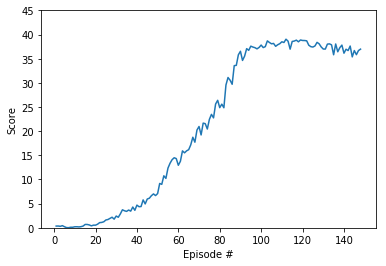

In [4]:
agent = DDPGAgent(STATE_SIZE, ACTION_SIZE, 1234, HIDDEN_UNITS, LR_ACTOR, LR_CRITIC, BATCH_SIZE, GAMMA, MEMORY_SIZE, NUM_ACTORS, EPSILON, TAU)
actor_path = 'model/p2_ddpg_actor.pth'
critic_path = 'model/p2_ddpg_critic.pth'

total_scores = []
for ep in range(1, TRAINING_EPISODES+1):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations
    score = 0

    agent.reset()

    while True:
        action = agent.act(state, True)
        
        env_info = env.step(action)[brain_name]
        reward = env_info.rewards
        next_state = env_info.vector_observations
        done = env_info.local_done

        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += sum(reward) / NUM_ACTORS

        if np.any(done):
            break

    total_scores.append(score)
    if ep > 0 and ep % 10 == 0:
        print("Ep: {}\tAverage Score: {:.2f}\tMax Score: {:.2f}".format(ep, np.mean(total_scores), np.max(total_scores)))

    if np.mean(total_scores[-100:]) > 30.0:
        print("Environment solved in {} epsidoes!\tAverage Score: {:.2f}".format(ep+1, np.mean(total_scores[-100:])))
        torch.save(agent.actor_local.state_dict(), actor_path)
        torch.save(agent.critic_local.state_dict(), critic_path)
        break           

fig = plt.figure()
fig.add_subplot(111)
plt.plot(np.arange(1, len(total_scores)+1), total_scores)
plt.ylim(0, 45)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()   

# 5. Validation

1 epsidoe score: 37.24, Average score: 37.24
2 epsidoe score: 35.49, Average score: 36.36
3 epsidoe score: 35.45, Average score: 36.06
4 epsidoe score: 36.48, Average score: 36.17
5 epsidoe score: 38.01, Average score: 36.53
6 epsidoe score: 35.34, Average score: 36.34
7 epsidoe score: 36.03, Average score: 36.29
8 epsidoe score: 35.81, Average score: 36.23
9 epsidoe score: 34.97, Average score: 36.09
10 epsidoe score: 36.22, Average score: 36.10
11 epsidoe score: 37.16, Average score: 36.20
12 epsidoe score: 36.97, Average score: 36.26
13 epsidoe score: 37.34, Average score: 36.35
14 epsidoe score: 36.25, Average score: 36.34
15 epsidoe score: 33.48, Average score: 36.15
16 epsidoe score: 36.55, Average score: 36.17
17 epsidoe score: 35.38, Average score: 36.13
18 epsidoe score: 36.55, Average score: 36.15
19 epsidoe score: 35.79, Average score: 36.13
20 epsidoe score: 36.16, Average score: 36.13
21 epsidoe score: 36.77, Average score: 36.16
22 epsidoe score: 35.28, Average score: 36.

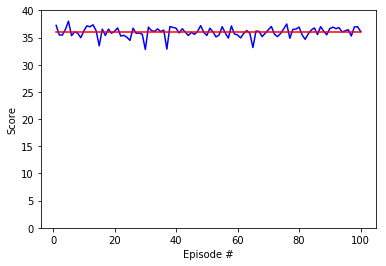

Total score (averaged over agents) this episode: 36.00


In [9]:
trained_agent = DDPGAgent(STATE_SIZE, ACTION_SIZE, 1234, HIDDEN_UNITS, LR_ACTOR, LR_CRITIC, BATCH_SIZE, GAMMA, MEMORY_SIZE, NUM_ACTORS, EPSILON, TAU)
trained_agent.actor_local.load_state_dict(torch.load(actor_path))
trained_agent.critic_local.load_state_dict(torch.load(critic_path))
total_scores = []

for ep in range(1, 101):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations             
    score = 0                                        
    while True:
        action = trained_agent.act(state, False)
        env_info = env.step(action)[brain_name]      
        state = env_info.vector_observations         
        reward = env_info.rewards                         
        done = env_info.local_done                        
        score += sum(reward) / NUM_ACTORS                 
        if np.any(done):                                  
            break
    total_scores.append(score)
    print("{} epsidoe score: {:.2f}, Average score: {:.2f}".format(ep, score, np.mean(total_scores)))

fig = plt.figure()
ax = fig.add_subplot(111)
x = range(1, len(total_scores)+1)
ax.plot(x, total_scores, color='blue')
ax.plot(x, np.ones_like(x) * np.mean(total_scores), color='red')

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.ylim(0, 40)
plt.show()   
print('Total score (averaged over agents) this episode: {:.2f}'.format(np.mean(total_scores)))

In [10]:
env.close()